In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %seaborn inline


1054    Ranch Fire (Mendocino Complex)
1055    Ranch Fire (Mendocino Complex)
1056    Ranch Fire (Mendocino Complex)
1057    Ranch Fire (Mendocino Complex)
Name: Name, dtype: object

In [25]:
# ****** DATASET 1 : THE FIRE DATA *******
#  Import and read the charity_data.csv.
import pandas as pd 
fire_df = pd.read_csv("Data/California_Fire_Incidents.csv")
fire_df[fire_df["CountyIds"] == '6,11,17,23']["Name"]

1054    Ranch Fire (Mendocino Complex)
1055    Ranch Fire (Mendocino Complex)
1056    Ranch Fire (Mendocino Complex)
1057    Ranch Fire (Mendocino Complex)
Name: Name, dtype: object

In [26]:
fire_df = fire_df.drop(["Active", 
"AdminUnit", 
"AirTankers",
"CanonicalUrl", 
"ConditionStatement", 
"ControlStatement",
"CrewsInvolved",
"Dozers",
"Engines",
"Helicopters",
"Extinguished",
"Fatalities",
"Featured",
"Final",
"FuelType",
"Injuries",
"Location",
# "Name",
"PercentContained",
"Public",
"SearchDescription",
"SearchKeywords",
"Status",
"StructuresDamaged",
"StructuresDestroyed",
"StructuresEvacuated",
"StructuresThreatened",
"UniqueId",
"Updated",
"WaterTenders"
], axis=1)
fire_df.head()

,AcresBurned,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Longitude,MajorIncident,Name,PersonnelInvolved,Started
0,257314.0,2013,True,Tuolumne,55,37.857000,-120.086000,False,Rim Fire,NaN,2013-08-17T15:25:00Z
1,30274.0,2013,True,Los Angeles,19,34.585595,-118.423176,False,Powerhouse Fire,NaN,2013-05-30T15:28:00Z
2,27531.0,2013,True,Riverside,33,33.709500,-116.728850,False,Mountain Fire,NaN,2013-07-15T13:43:00Z
3,27440.0,2013,False,Placer,31,39.120000,-120.650000,False,American Fire,NaN,2013-08-10T16:30:00Z
4,24251.0,2013,True,Ventura,56,0.000000,0.000000,True,Springs Fire,2167.0,2013-05-02T07:01:00Z


In [27]:
# LOOK AT UNDECIDED COUNTIES
[(column, fire_df[column].nunique()) for column in fire_df]

[('AcresBurned', 634),
 ('ArchiveYear', 7),
 ('CalFireIncident', 2),
 ('Counties', 59),
 ('CountyIds', 79),
 ('Latitude', 1441),
 ('Longitude', 1448),
 ('MajorIncident', 2),
 ('Name', 1193),
 ('PersonnelInvolved', 151),
 ('Started', 1597)]

In [28]:
[(column, fire_df[column].unique()) for column in fire_df[["Counties","CountyIds"]]]

[('Counties',
  array(['Tuolumne', 'Los Angeles', 'Riverside', 'Placer', 'Ventura',
         'Fresno', 'Siskiyou', 'Humboldt', 'Tehama', 'Shasta', 'San Diego',
         'Kern', 'Sonoma', 'Contra Costa', 'Butte', 'Tulare',
         'Santa Barbara', 'Mariposa', 'Monterey', 'El Dorado',
         'San Bernardino', 'Plumas', 'Modoc', 'San Luis Obispo', 'Madera',
         'Inyo', 'Napa', 'San Benito', 'San Joaquin', 'Lake', 'Alameda',
         'Glenn', 'Yolo', 'Sacramento', 'Stanislaus', 'Solano', 'Merced',
         'Mendocino', 'Lassen', 'Amador', 'Yuba', 'Nevada', 'Santa Clara',
         'Calaveras', 'San Mateo', 'Orange', 'Colusa', 'Trinity',
         'Del Norte', 'Mono', 'Alpine', 'Sutter', 'Kings', 'Sierra',
         'Santa Cruz', 'Marin', 'Mexico', 'State of Oregon',
         'State of Nevada'], dtype=object)),
 ('CountyIds',
  array(['55', '19', '33', '31', '56', '10', '47', '12', '52', '45', '37',
         '15,56', '49', '7', '4', '54', '42', '22', '33,', '27', '15', '9',
         '3

In [5]:
fire_df[fire_df["CountyIds"] == '6,11,17,23']

,AcresBurned,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Longitude,MajorIncident,Name,PersonnelInvolved,Started
1054,410203.0,2018,True,Colusa,"6,11,17,23",39.243283,-123.103367,True,Ranch Fire (Mendocino Complex),NaN,2018-07-27T12:05:00Z
1055,410203.0,2018,True,Glenn,"6,11,17,23",39.243283,-123.103367,True,Ranch Fire (Mendocino Complex),NaN,2018-07-27T12:05:00Z
1056,410203.0,2018,True,Lake,"6,11,17,23",39.243283,-123.103367,True,Ranch Fire (Mendocino Complex),NaN,2018-07-27T12:05:00Z
1057,410203.0,2018,True,Mendocino,"6,11,17,23",39.243283,-123.103367,True,Ranch Fire (Mendocino Complex),NaN,2018-07-27T12:05:00Z


In [6]:
fire_df[fire_df["CountyIds"] == '6']

,AcresBurned,ArchiveYear,CalFireIncident,Counties,CountyIds,Latitude,Longitude,MajorIncident,Name,PersonnelInvolved,Started
841,70.0,2017,True,Colusa,6,39.012240,-122.201270,True,Sand Fire,76.0,2017-07-17T13:17:00Z
1218,75.0,2018,True,Colusa,6,39.297600,-122.512012,True,Stony Fire,NaN,2018-07-04T13:14:00Z
1599,20.0,2019,True,Colusa,6,39.088333,-122.309167,True,Spring Fire,65.0,2019-08-14T12:52:00Z


In [7]:
# ****** DATASET 2 : THE ENVIRONMENTAL DATA *******
env_df = pd.read_csv("Data/all_env_conditions.csv")

In [8]:
env_df = env_df.drop(["Target", "CIMIS Region"], axis=1)
env_df.head()

,Stn Id,Stn Name,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F)
0,2,FivePoints,1/1/2018,0.06,0.00,219.0,7.3,63.4,35.3,47.8,82.0,46.0,65.0,36.6,3.3,78.3,51.1
1,2,FivePoints,1/2/2018,0.04,0.00,127.0,7.4,59.8,37.7,47.2,80.0,52.0,67.0,36.7,3.1,74.5,51.3
2,2,FivePoints,1/3/2018,0.04,0.00,125.0,8.4,61.1,37.3,49.9,79.0,49.0,68.0,39.9,4.5,107.5,51.3
3,2,FivePoints,1/4/2018,0.07,0.01,219.0,11.6,69.2,48.7,56.8,94.0,52.0,74.0,48.5,5.8,140.2,53.0
4,2,FivePoints,1/5/2018,0.07,0.00,239.0,12.7,73.8,47.5,59.8,94.0,49.0,72.0,50.8,4.2,101.4,54.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128120,262,Linden,9/14/2020,0.14,0.00,420.0,15.4,84.3,53.7,66.3,95.0,39.0,70.0,56.2,3.4,81.7,69.4
128121,262,Linden,9/15/2020,0.15,0.00,430.0,15.1,86.8,49.6,66.0,96.0,31.0,69.0,55.7,2.7,64.2,69.0
128122,262,Linden,9/16/2020,0.15,0.00,445.0,16.2,89.0,53.6,68.0,97.0,30.0,69.0,57.6,3.3,78.2,69.0
128123,262,Linden,9/17/2020,0.16,0.00,447.0,16.6,88.1,53.3,70.4,97.0,35.0,65.0,58.3,3.3,78.1,69.5


In [20]:
# ADD THE "YEAR" COLUMN TO THE DATABASE
env_df["Year"] = pd.DatetimeIndex(env_df["Date"]).year

In [21]:
env_df.head()

,Stn Id,Stn Name,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),County,Year
0,2,FivePoints,1/1/2018,0.06,0.00,219.0,7.3,63.4,35.3,47.8,82.0,46.0,65.0,36.6,3.3,78.3,51.1,Fresno,2018
1,2,FivePoints,1/2/2018,0.04,0.00,127.0,7.4,59.8,37.7,47.2,80.0,52.0,67.0,36.7,3.1,74.5,51.3,Fresno,2018
2,2,FivePoints,1/3/2018,0.04,0.00,125.0,8.4,61.1,37.3,49.9,79.0,49.0,68.0,39.9,4.5,107.5,51.3,Fresno,2018
3,2,FivePoints,1/4/2018,0.07,0.01,219.0,11.6,69.2,48.7,56.8,94.0,52.0,74.0,48.5,5.8,140.2,53.0,Fresno,2018
4,2,FivePoints,1/5/2018,0.07,0.00,239.0,12.7,73.8,47.5,59.8,94.0,49.0,72.0,50.8,4.2,101.4,54.4,Fresno,2018


In [24]:
env_df.groupby([ "County","Year"]).agg({
    "ETo (in)":"sum",
    "Precip (in)":"sum",
    "Sol Rad (Ly/day)" : "mean",
    "Avg Vap Pres (mBars)": "mean",
    "Max Air Temp (F)":"max",
    "Min Air Temp (F)":"min",
    "Avg Air Temp (F)":"mean",
    "Max Rel Hum (%)":"max",
    "Min Rel Hum (%)":"min",
    "Avg Rel Hum (%)":"mean",
    "Dew Point (F)":"mean",
    "Avg Wind Speed (mph)":"mean",
    "Wind Run (miles)":"sum",
    "Avg Soil Temp (F)":"mean"
    
})

ETo (in)  Precip (in)  Sol Rad (Ly/day)  Avg Vap Pres (mBars)  \
County  Year                                                                  
Alameda 2018    132.60        40.31        437.525880             11.453520   
        2019    141.87        57.87        430.446849             11.761336   
        2020    116.04        24.83        494.154263             11.959811   
Alpine  2019     33.83         5.56        460.730570              5.764767   
        2020     47.24         7.60        494.196000              5.687200   
...                ...          ...               ...                   ...   
Yolo    2019    103.37        52.17        423.879884             11.326339   
        2020     93.16         7.80        484.657692             11.652308   
Yuba    2018     53.66        29.46        414.373626             10.895330   
        2019     50.31        38.85        389.365922             10.772626   
        2020     43.90         9.42        453.848837             10.947674   

              Max Air Temp (F)  Min Air Temp (F)  Avg Air Temp (F)  \
County  Year                                                         
Alameda 2018              99.3              19.9         57.542340   
        2019             101.6              26.8         57.896237   
        2020             108.8              28.3         59.092828   
Alpine  2019              92.0               4.6         50.388601   
        2020              95.5               2.6         51.298000   
...                        ...               ...               ...   
Yolo    2019             106.7              28.0         61.141823   
        2020             107.6              31.5         64.029808   
Yuba    2018             102.6              25.1         63.007143   
        2019             102.8              28.5         62.072067   
        2020             109.2              29.8         65.562403   

              Max Rel Hum (%)  Min Rel Hum (%)  Avg Rel Hum (%)  \
County  Year                                                      
Alameda 2018            100.0              9.0        69.966874   
        2019            100.0              9.0        70.883349   
        2020            100.0              8.0        69.369418   
Alpine  2019             99.0              9.0        46.461140   
        2020             99.0              7.0        44.064000   
...                       ...              ...              ...   
Yolo    2019            100.0              0.0        61.942113   
        2020            100.0              0.0        57.796154   
Yuba    2018            100.0              6.0        56.659341   
        2019             99.0              7.0        57.332402   
        2020             97.0              6.0        52.282946   

              Dew Point (F)  Avg Wind Speed (mph)  Wind Run (miles)  \
County  Year                                                          
Alameda 2018      47.291408              3.950828           91571.3   
        2019      47.977046              3.985042          101675.7   
        2020      48.479296              4.134100           73299.5   
Alpine  2019      28.563731              7.091192           32844.3   
        2020      28.673200              7.628000           45771.7   
...                     ...                   ...               ...   
Yolo    2019      46.525904              5.039653           83597.8   
        2020      47.538654              5.125962           63957.6   
Yuba    2018      45.538187              4.081044           35660.8   
        2019      45.231564              4.482682           38527.0   
        2020      45.889147              4.168605           25833.0   

              Avg Soil Temp (F)  
County  Year                     
Alameda 2018          61.806315  
        2019          60.736218  
        2020          62.526928  
Alpine  2019          51.319171  
        2020          50.794800  
...                         ...  
Yolo   

In [9]:
active_stations_df = pd.read_csv("Data/Active_Fire_Stations.csv")
active_stations_df = active_stations_df.drop(["Status", "Name"], axis=1) 

In [10]:
active_stations_df.head()

,Station ID,County
0,2,Fresno
1,5,Kern
2,6,Yolo
3,7,Fresno
4,12,Butte


In [11]:
env_df = env_df.merge(right=active_stations_df, left_on="Stn Id", right_on="Station ID").drop("Station ID", axis=1)

In [12]:
env_df.head()

,Stn Id,Stn Name,Date,ETo (in),Precip (in),Sol Rad (Ly/day),Avg Vap Pres (mBars),Max Air Temp (F),Min Air Temp (F),Avg Air Temp (F),Max Rel Hum (%),Min Rel Hum (%),Avg Rel Hum (%),Dew Point (F),Avg Wind Speed (mph),Wind Run (miles),Avg Soil Temp (F),County
0,2,FivePoints,1/1/2018,0.06,0.00,219.0,7.3,63.4,35.3,47.8,82.0,46.0,65.0,36.6,3.3,78.3,51.1,Fresno
1,2,FivePoints,1/2/2018,0.04,0.00,127.0,7.4,59.8,37.7,47.2,80.0,52.0,67.0,36.7,3.1,74.5,51.3,Fresno
2,2,FivePoints,1/3/2018,0.04,0.00,125.0,8.4,61.1,37.3,49.9,79.0,49.0,68.0,39.9,4.5,107.5,51.3,Fresno
3,2,FivePoints,1/4/2018,0.07,0.01,219.0,11.6,69.2,48.7,56.8,94.0,52.0,74.0,48.5,5.8,140.2,53.0,Fresno
4,2,FivePoints,1/5/2018,0.07,0.00,239.0,12.7,73.8,47.5,59.8,94.0,49.0,72.0,50.8,4.2,101.4,54.4,Fresno


In [13]:
# ****** DATASET 3 : THE ELECTRICITY USAGE DATA *******
electric_df = pd.read_csv("Data/ElectricityByCounty CALIFORNIA Usage in Millions of kWh.csv")

In [14]:
# Find the totals for each sector, and then drop that column.
electric_df = electric_df[electric_df["Sector"] == "Total"].drop(["Sector"], axis=1)

# Drop the years before 2013
electric_df = electric_df.iloc[:, :8]

In [15]:
electric_df.head()

,County,2019,2018,2017,2016,2015,2014,2013
2,ALAMEDA,10684.085867,10391.361826,11079.450563,10791.224841,10235.384987,10299.877787,10618.661255
5,ALPINE,18.906214,18.704208,18.976912,17.415654,16.209900,15.983364,18.176468
8,AMADOR,317.885054,304.092677,313.312866,309.094100,285.308438,289.501492,310.344276
11,BUTTE,1396.246344,1475.788821,1529.818607,1482.073760,1492.098630,1489.484147,1502.980505
14,CALAVERAS,330.559070,332.353511,347.931437,316.143601,311.620104,319.671411,326.656878


In [16]:
# ****** DATASET 4 : THE HOUSING DATA *******
housing_df = pd.read_csv("Data/housing.csv")

In [17]:
housing_df = housing_df.drop(["housing_median_age", "total_rooms","total_bedrooms"], axis=1)
housing_df.head()

,longitude,latitude,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,565.0,259.0,3.8462,342200.0,NEAR BAY


In [18]:
def boxplot_it(df, column_number):
    print("THERE ARE {} NUMERICAL COLUMNS IN THIS DF AVAILABLE".format( len(df.select_dtypes(include='number').columns)) )
    number_df = pd.DataFrame(df.select_dtypes(include='number').iloc[:,column_number])
    [plt.boxplot(x=number_df[column].dropna(), labels=[column]) for column in number_df]

THERE ARE 5 NUMERICAL COLUMNS IN THIS DF AVAILABLE


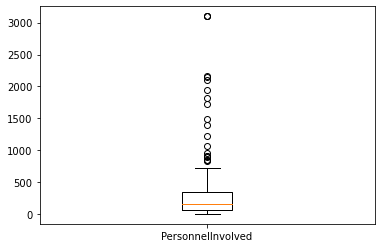

In [19]:
boxplot_it(fire_df,4 )
